Note: Collapse the headers to see the organization in the code. Each section can be run independently.

### Run these cells first, needed by all methods below.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from json import dump
import gc

In [2]:
data = pd.read_csv("data/cliplog.csv")
data = data.drop("Unnamed: 0", axis=1)

In [3]:
info = ['activity_year', 'lei', 'derived_msa_md', 'state_code', 'county_code', 'census_tract']
continuous = ['loan_amount',
 'combined_loan_to_value_ratio',
 'interest_rate',
 'rate_spread',
 'total_loan_costs',
 'origination_charges',
 'discount_points',
 'lender_credits',
 'loan_term',
 'property_value',
 'total_units',
 'income',
 'debt_to_income_ratio',
 'applicant_age',
 'tract_population',
 'tract_minority_population_percent',
 'ffiec_msa_md_median_family_income',
 'tract_to_msa_income_percentage',
 'tract_owner_occupied_units',
 'tract_one_to_four_family_homes',
 'tract_median_age_of_housing_units',
 'leifreq']
categorical = ['na_age',
 'derived_loan_product_type:_Conventional:Subordinate Lien',
 'derived_loan_product_type:_FHA:First Lien',
 'derived_loan_product_type:_FHA:Subordinate Lien',
 'derived_loan_product_type:_FSA/RHS:First Lien',
 'derived_loan_product_type:_FSA/RHS:Subordinate Lien',
 'derived_loan_product_type:_VA:First Lien',
 'derived_loan_product_type:_VA:Subordinate Lien',
 'conforming_loan_limit:_NC',
 'conforming_loan_limit:_U',
 'derived_ethnicity:_Free Form Text Only',
 'derived_ethnicity:_Hispanic or Latino',
 'derived_ethnicity:_Joint',
 'derived_ethnicity:_Not Hispanic or Latino',
 'derived_race:_American Indian or Alaska Native',
 'derived_race:_Asian',
 'derived_race:_Black or African American',
 'derived_race:_Free Form Text Only',
 'derived_race:_Joint',
 'derived_race:_Native Hawaiian or Other Pacific Islander',
 'derived_race:_Race Not Available',
 'derived_race:_White',
 'derived_sex:_Joint',
 'derived_sex:_Male',
 'derived_sex:_Sex Not Available',
 'derived_dwelling_category:_Multifamily:Site-Built',
 'derived_dwelling_category:_Single Family (1-4 Units):Manufactured',
 'derived_dwelling_category:_Single Family (1-4 Units):Site-Built',
 'action_taken:_2',
 'action_taken:_3',
 'action_taken:_4',
 'action_taken:_5',
 'action_taken:_6',
 'action_taken:_7',
 'action_taken:_8',
 'purchaser_type:_1',
 'purchaser_type:_2',
 'purchaser_type:_3',
 'purchaser_type:_4',
 'purchaser_type:_5',
 'purchaser_type:_6',
 'purchaser_type:_8',
 'purchaser_type:_9',
 'purchaser_type:_71',
 'purchaser_type:_72',
 'preapproval:_2',
 'loan_type:_2',
 'loan_type:_3',
 'loan_type:_4',
 'loan_purpose:_2',
 'loan_purpose:_4',
 'loan_purpose:_5',
 'loan_purpose:_31',
 'loan_purpose:_32',
 'lien_status:_2',
 'reverse_mortgage:_2',
 'reverse_mortgage:_1111',
 'open_end_line_of_credit:_2',
 'open_end_line_of_credit:_1111',
 'business_or_commercial_purpose:_2',
 'business_or_commercial_purpose:_1111',
 'hoepa_status:_2',
 'hoepa_status:_3',
 'negative_amortization:_2',
 'negative_amortization:_1111',
 'interest_only_payment:_2',
 'interest_only_payment:_1111',
 'balloon_payment:_2',
 'balloon_payment:_1111',
 'other_nonamortizing_features:_2',
 'other_nonamortizing_features:_1111',
 'construction_method:_2',
 'occupancy_type:_2',
 'occupancy_type:_3',
 'manufactured_home_secured_property_type:_2',
 'manufactured_home_secured_property_type:_3',
 'manufactured_home_secured_property_type:_1111',
 'manufactured_home_land_property_interest:_2',
 'manufactured_home_land_property_interest:_3',
 'manufactured_home_land_property_interest:_4',
 'manufactured_home_land_property_interest:_5',
 'manufactured_home_land_property_interest:_1111',
 'applicant_credit_score_type:_2',
 'applicant_credit_score_type:_3',
 'applicant_credit_score_type:_4',
 'applicant_credit_score_type:_5',
 'applicant_credit_score_type:_6',
 'applicant_credit_score_type:_7',
 'applicant_credit_score_type:_8',
 'applicant_credit_score_type:_9',
 'applicant_credit_score_type:_1111',
 'submission_of_application:_2',
 'submission_of_application:_3',
 'submission_of_application:_1111',
 'initially_payable_to_institution:_2',
 'initially_payable_to_institution:_3',
 'initially_payable_to_institution:_1111',
 'aus_1:_2',
 'aus_1:_3',
 'aus_1:_4',
 'aus_1:_5',
 'aus_1:_6',
 'aus_1:_1111',
 'denial_reason_1:_2',
 'denial_reason_1:_3',
 'denial_reason_1:_4',
 'denial_reason_1:_5',
 'denial_reason_1:_6',
 'denial_reason_1:_7',
 'denial_reason_1:_8',
 'denial_reason_1:_9',
 'denial_reason_1:_10',
 'denial_reason_1:_1111']

predictors = continuous[:]
predictors.remove("leifreq")

### Initial exploration

In [3]:
data

,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,loan_amount,combined_loan_to_value_ratio,interest_rate,rate_spread,...,denial_reason_1:_2,denial_reason_1:_3,denial_reason_1:_4,denial_reason_1:_5,denial_reason_1:_6,denial_reason_1:_7,denial_reason_1:_8,denial_reason_1:_9,denial_reason_1:_10,denial_reason_1:_1111
0,2020,0,11244,CA,6059.0,6.059042e+09,12.779873,3.720620,2.875000,0.352146,...,False,False,False,False,False,False,False,False,True,False
1,2020,0,23224,MD,24031.0,2.403170e+10,13.028053,4.701541,3.317022,0.352146,...,False,False,False,False,False,False,False,False,True,False
2,2020,0,28140,KS,20091.0,2.009105e+10,12.691580,4.038127,2.490000,-0.329000,...,False,False,False,False,False,False,False,False,True,False
3,2020,0,99999,CA,6057.0,6.057001e+09,12.660328,3.752558,3.000000,0.352146,...,False,False,False,False,False,False,False,False,True,False
4,2020,0,21660,OR,41039.0,4.103901e+10,12.660328,3.864722,2.500000,0.235000,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7706037,2020,0,19740,CO,8031.0,8.031001e+09,13.151922,4.317488,2.990000,0.196000,...,False,False,False,False,False,False,False,False,True,False
7706038,2020,0,33460,MN,27037.0,2.703706e+10,12.959844,4.701541,2.625000,-0.265000,...,False,False,False,False,False,False,False,False,True,False
7706039,2020,0,36084,CA,6001.0,6.001451e+09,13.534473,4.701541,3.317022,0.352146,...,False,False,False,False,False,False,False,False,True,False
7706040,2020,0,19740,CO,8035.0,8.035014e+09,12.983101,4.701541,3.317022,0.352146,...,False,False,False,False,False,False,False,False,True,False


In [5]:
[x for x in data.keys()]

['activity_year',
 'lei',
 'derived_msa_md',
 'state_code',
 'county_code',
 'census_tract',
 'loan_amount',
 'combined_loan_to_value_ratio',
 'interest_rate',
 'rate_spread',
 'total_loan_costs',
 'origination_charges',
 'discount_points',
 'lender_credits',
 'loan_term',
 'property_value',
 'total_units',
 'income',
 'debt_to_income_ratio',
 'applicant_age',
 'tract_population',
 'tract_minority_population_percent',
 'ffiec_msa_md_median_family_income',
 'tract_to_msa_income_percentage',
 'tract_owner_occupied_units',
 'tract_one_to_four_family_homes',
 'tract_median_age_of_housing_units',
 'leifreq',
 'na_age',
 'derived_loan_product_type:_Conventional:Subordinate Lien',
 'derived_loan_product_type:_FHA:First Lien',
 'derived_loan_product_type:_FHA:Subordinate Lien',
 'derived_loan_product_type:_FSA/RHS:First Lien',
 'derived_loan_product_type:_FSA/RHS:Subordinate Lien',
 'derived_loan_product_type:_VA:First Lien',
 'derived_loan_product_type:_VA:Subordinate Lien',
 'conforming_loan

In [4]:
with open("data/info_cont_cat.json", 'w') as file:
    dump((info, continuous, categorical), file)

### Leifreq transform

(array([ 130999.,  764818., 1200094., 1069490.,  741570.,  971091.,
         896213.,  686714.,  441635.,  803418.]),
 array([ 1.        ,  3.49079672,  5.98159344,  8.47239016, 10.96318688,
        13.4539836 , 15.94478032, 18.43557705, 20.92637377, 23.41717049,
        25.90796721]),
 <BarContainer object of 10 artists>)

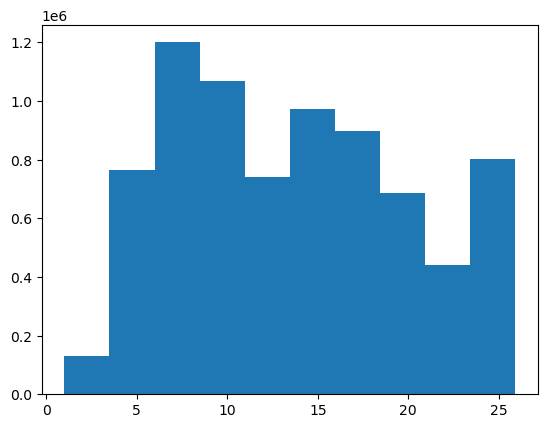

In [25]:
plt.hist(np.power(data["leifreq"], 0.25))

This transform is natural to create a nice spread in the data and see the nuances

### Interesting Plots

We want to see clear groups or patterns in the color of the plot to indicate that the variables are useful in separating co-institutional frequency.

In [ ]:
data["discount_points"][data["action_taken:_6"]]

count    832985.000000
mean          1.475091
std           2.931755
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          12.515948
Name: discount_points, dtype: float64

In [5]:
data["action_taken:_6"].sum()

832985

In [15]:
data["action_taken:_8"].sum()

21048

Text(0, 0.5, 'Interest Rate')

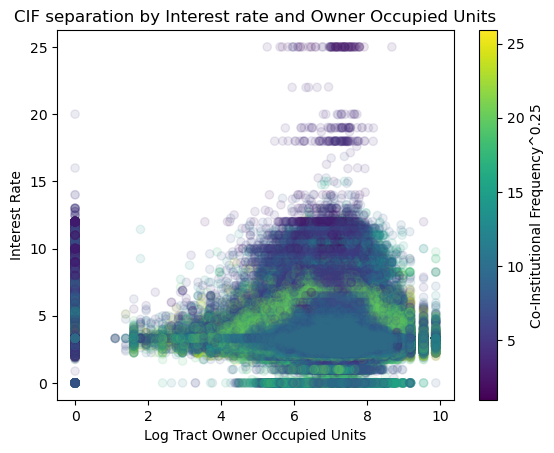

In [38]:
S = plt.scatter(data["tract_owner_occupied_units"], data["interest_rate"], c=np.power(data["leifreq"], 0.25), alpha=0.1)
cbar = plt.colorbar(S)
cbar.solids.set(alpha=1)
cbar.set_label("Co-Institutional Frequency^0.25")
plt.title("CIF separation by Interest rate and Owner Occupied Units")
plt.xlabel("Log Tract Owner Occupied Units")
plt.ylabel("Interest Rate")

Text(0, 0.5, 'Interest Rate')

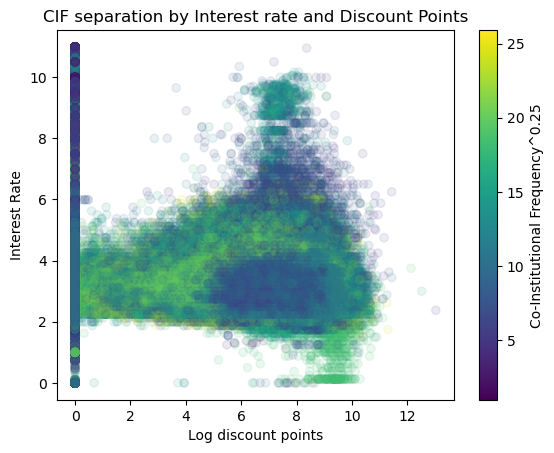

In [40]:
S = plt.scatter(data["discount_points"][data["interest_rate"] < 11], data["interest_rate"][data["interest_rate"] < 11], c=np.power(data["leifreq"][data["interest_rate"] < 11], 0.25), alpha=0.1)
cbar = plt.colorbar(S)
cbar.solids.set(alpha=1)
cbar.set_label("Co-Institutional Frequency^0.25")
plt.title("CIF separation by Interest rate and Discount Points")
plt.xlabel("Log discount points")
plt.ylabel("Interest Rate")

(array([1.098890e+05, 3.760000e+02, 9.470000e+02, 4.209000e+03,
        1.852200e+04, 1.764230e+05, 1.933524e+06, 4.957932e+06,
        4.887600e+05, 1.546000e+04]),
 array([0.        , 0.9879707 , 1.9759414 , 2.96391211, 3.95188281,
        4.93985351, 5.92782421, 6.91579492, 7.90376562, 8.89173632,
        9.87970702]),
 <BarContainer object of 10 artists>)

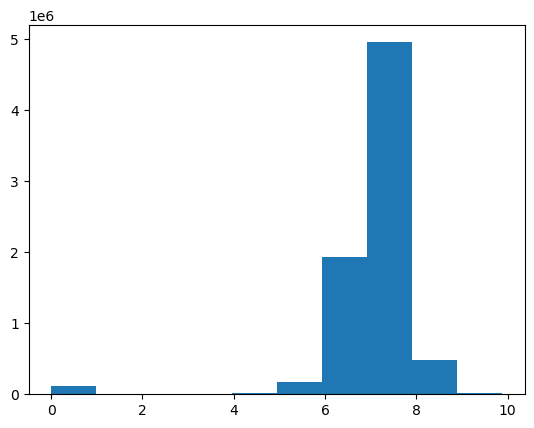

In [42]:
plt.hist(data["tract_owner_occupied_units"])

In [37]:
np.median(data["income"][data["income"] > 0])

4.718498871295094

In [36]:
np.median(data["discount_points"][data["discount_points"] > 0])

7.31986492980897

Text(0, 0.5, 'Log Discount Points')

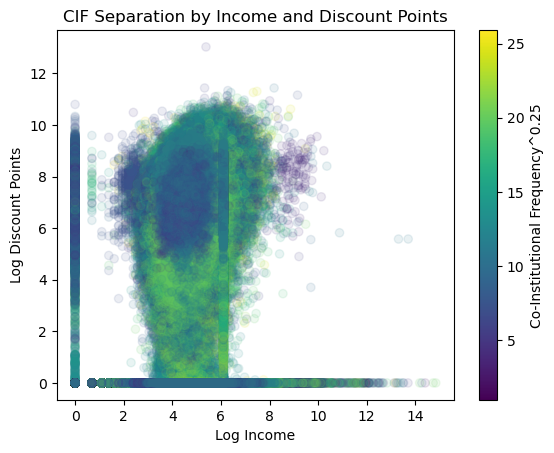

In [28]:
S = plt.scatter(data["income"][~data["action_taken:_6"]], data["discount_points"][~data["action_taken:_6"]], c=np.power(data["leifreq"][~data["action_taken:_6"]], 0.25), alpha=0.1)
cbar = plt.colorbar(S)
cbar.solids.set(alpha=1)
cbar.set_label("Co-Institutional Frequency^0.25")
plt.title("CIF Separation by Income and Discount Points")
plt.xlabel("Log Income")
plt.ylabel("Log Discount Points")

Text(0, 0.5, 'Log Property Value')

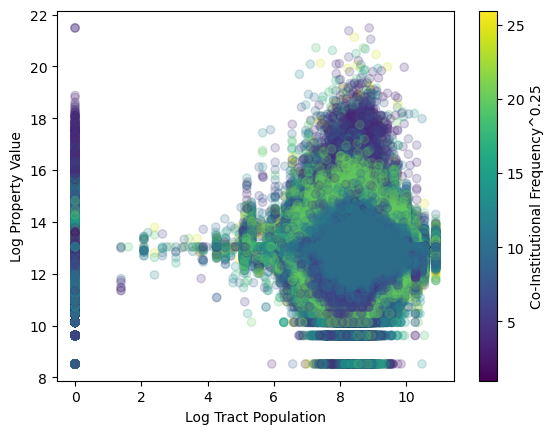

In [7]:
S = plt.scatter(data["tract_population"], data["property_value"], c=np.power(data["leifreq"], 0.25), alpha=0.2)
cbar = plt.colorbar(S)
cbar.solids.set(alpha=1)
cbar.set_label("Co-Institutional Frequency^0.25")
plt.xlabel("Log Tract Population")
plt.ylabel("Log Property Value")

Text(0, 0.5, 'Log Discount Points')

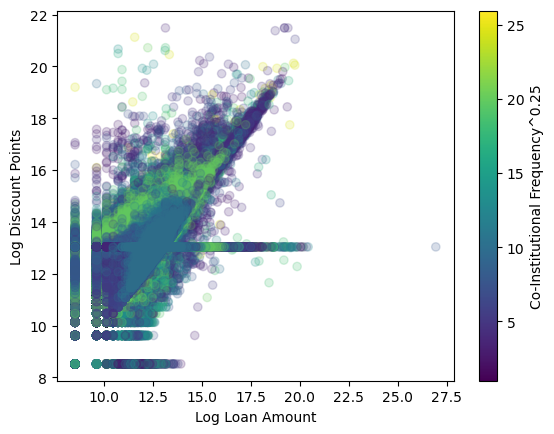

In [44]:
S = plt.scatter(data["discount_points"], data["property_value"], c=np.power(data["leifreq"], 0.25), alpha=0.2)
cbar = plt.colorbar(S)
cbar.solids.set(alpha=1)
cbar.set_label("Co-Institutional Frequency^0.25")
plt.xlabel("Log Discount Points")
plt.ylabel("Log Property Value")

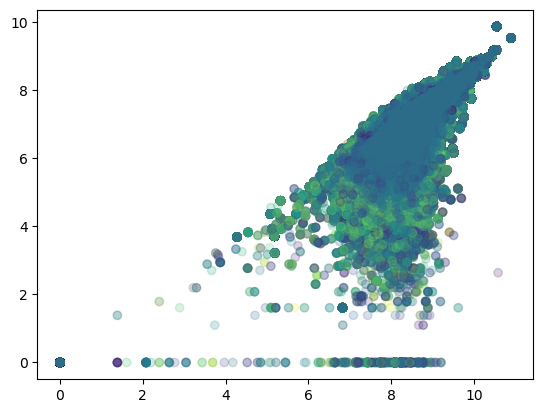

In [9]:
plt.scatter(data["tract_population"], data["tract_owner_occupied_units"], c=np.power(data["leifreq"], 0.25), alpha=0.2)

### Normalized PCA on Continuous Components

Continuous components used to decrease PCA noise.

In [29]:
predictors = continuous[:]
predictors.remove("leifreq")
cont = data[predictors].to_numpy()

means = np.mean(cont, axis=0)
stds = np.std(cont, axis=0)

X = ((cont.T - means.reshape(-1, 1)) / stds.reshape(-1, 1)).T

In [30]:
cov = np.cov(X, rowvar=False)
pca = np.linalg.eig(cov)

In [31]:
pca.eigenvectors

array([[-1.83612433e-01, -4.89223095e-01, -1.68963695e-01,
        -9.75326740e-03, -7.42357019e-03, -1.89117304e-01,
         6.17388618e-01, -2.62374052e-02,  1.22889226e-01,
        -1.17220310e-01,  1.00459155e-01, -3.86288626e-01,
         1.57304106e-01,  2.33607796e-01,  3.58767132e-02,
        -1.01537599e-02,  5.02445962e-02, -4.10109112e-02,
        -1.15983328e-02, -8.59777635e-02,  5.65418722e-03],
       [ 5.91080729e-02,  5.62341725e-02, -1.51599510e-01,
         5.94776793e-03,  9.70449942e-04, -5.17910812e-01,
        -2.51587546e-01, -3.56758214e-01, -5.16065530e-02,
        -3.90768290e-02, -1.01450071e-01,  8.34683986e-02,
         1.26587938e-01,  4.64962253e-01,  2.13738489e-01,
         3.39618205e-01, -1.61136644e-01,  2.20061760e-01,
        -6.89714698e-02,  1.32893502e-01,  4.74981569e-03],
       [ 1.10015062e-01,  3.00561590e-01, -3.10094628e-01,
        -2.59332253e-03, -2.13289316e-03, -4.66389035e-02,
        -8.85086626e-02,  4.89573720e-02,  4.00449772e

In [32]:
pca.eigenvalues

array([3.42424441, 2.19132156, 1.59504307, 0.03376398, 0.04547254,
       1.46833589, 0.26078599, 1.39746947, 1.29811175, 1.23948154,
       0.41837381, 0.44126356, 0.49120987, 0.57130847, 0.62280425,
       0.78581665, 0.83009414, 1.04586657, 0.99255974, 0.91027703,
       0.93639838])

In [33]:
eigsort = np.argsort(pca.eigenvalues)[::-1]
evals = pca.eigenvalues[eigsort]
evecs = pca.eigenvectors[:, eigsort]

In [34]:
proja = X @ evecs

Text(0, 0.5, 'Second PC')

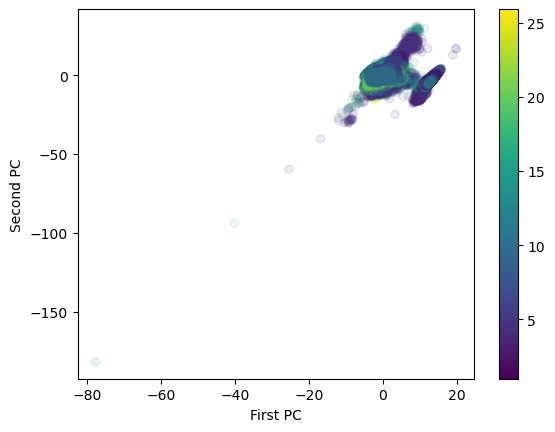

In [ ]:
S = plt.scatter(proja[:, 0], proja[:, 1], c=np.power(data["leifreq"], 0.25), alpha=0.1)
cbar = plt.colorbar(S)
cbar.solids.set(alpha=1)
plt.xlabel("First PC")
plt.ylabel("Second PC")

### Normalized PCA with less outliers

In [35]:
remove = np.argwhere(proja[:, 0] < -8)

In [36]:
remove

array([[ 917999],
       [ 918498],
       [ 938971],
       [ 945608],
       [ 949317],
       [1002088],
       [1044063],
       [1141028],
       [1324810],
       [1330067],
       [1686043],
       [1977091],
       [2219431],
       [2219714],
       [2471425],
       [2471600],
       [2471674],
       [2471814],
       [2472012],
       [2472196],
       [3760633],
       [3760814],
       [3760828],
       [3760875],
       [4055308],
       [4393057],
       [5805985],
       [5815170],
       [5815255],
       [5815416],
       [5815837],
       [6104090],
       [6161623],
       [6560698]])

In [37]:
cont_new = np.delete(cont, remove, axis=0)

means = np.mean(cont_new, axis=0)
stds = np.std(cont_new, axis=0)

X = ((cont_new.T - means.reshape(-1, 1)) / stds.reshape(-1, 1)).T

cov = np.cov(X, rowvar=False)
pca = np.linalg.eig(cov)
eigsort = np.argsort(pca.eigenvalues)[::-1]
evals = pca.eigenvalues[eigsort]
evecs = pca.eigenvectors[:, eigsort]
proj = X @ evecs
gc.collect()

21

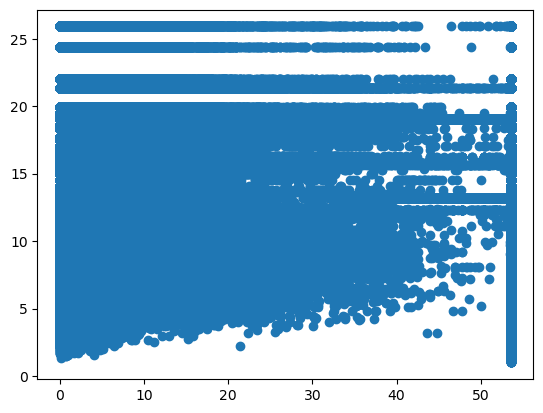

In [72]:
point = np.median(data["discount_points"][data["discount_points"] > 0])
plt.scatter(np.square(data["discount_points"] - point), np.power(data["leifreq"], 0.25))

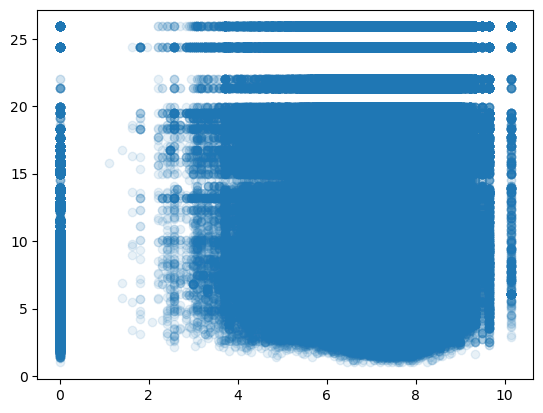

In [71]:
plt.scatter(data["tract_one_to_four_family_homes"], np.power(data["leifreq"], 0.25), alpha=0.1)

In [42]:
continuous

['loan_amount',
 'combined_loan_to_value_ratio',
 'interest_rate',
 'rate_spread',
 'total_loan_costs',
 'origination_charges',
 'discount_points',
 'lender_credits',
 'loan_term',
 'property_value',
 'total_units',
 'income',
 'debt_to_income_ratio',
 'applicant_age',
 'tract_population',
 'tract_minority_population_percent',
 'ffiec_msa_md_median_family_income',
 'tract_to_msa_income_percentage',
 'tract_owner_occupied_units',
 'tract_one_to_four_family_homes',
 'tract_median_age_of_housing_units',
 'leifreq']

In [41]:
evecs[:, 0]

array([-0.18713551,  0.05936543,  0.11189617,  0.08108225, -0.15994364,
        0.03843722, -0.07746733, -0.07210971, -0.04761602, -0.18221301,
        0.00752648, -0.1175369 ,  0.06565439, -0.03158966, -0.48046237,
       -0.02977513, -0.2852486 , -0.29442536, -0.4838819 , -0.46418502,
       -0.00765466])

In [45]:
evecs[:, 1]

array([-0.48302637,  0.05387274,  0.29629363,  0.2552461 , -0.20624489,
        0.0037763 , -0.10378994, -0.16489747, -0.13694277, -0.43392768,
       -0.06691485, -0.24203838,  0.09970775,  0.03759513,  0.25852965,
        0.01522714, -0.1219252 , -0.11204013,  0.26087602,  0.29325097,
        0.01804596])

In [46]:
evecs[:, 2]

array([-0.17322532, -0.145986  , -0.30688624, -0.27241273,  0.49533479,
       -0.02983836,  0.45361011,  0.03971659,  0.04530279, -0.34692108,
       -0.25995781, -0.22070521, -0.10524187, -0.08659325, -0.01100489,
       -0.10827627, -0.19661159, -0.08519416,  0.01813616,  0.02479244,
       -0.10360748])

In [47]:
evecs[:, 3]

array([-0.17848597, -0.5114672 , -0.0672285 , -0.11683136, -0.13099156,
        0.02536561, -0.0654136 , -0.13905165, -0.45766085,  0.14497921,
        0.02286711, -0.00502201, -0.22733363,  0.42472776, -0.08099842,
       -0.32668273, -0.05879161,  0.24981339,  0.00212865, -0.03850817,
       -0.05683814])

In [38]:
response = np.delete(data["leifreq"].to_numpy(), remove)

Text(0.5, 1.0, 'CIF Separation by PCA')

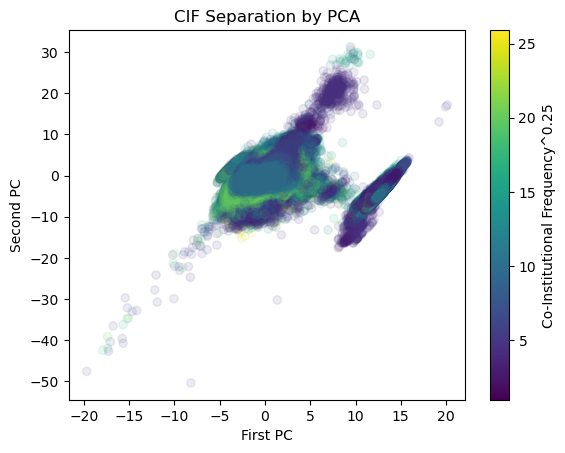

In [53]:
S = plt.scatter(proj[:, 0], proj[:, 1], c=np.power(response, 0.25), alpha=0.1)
cbar = plt.colorbar(S)
cbar.solids.set(alpha=1)
cbar.set_label("Co-Institutional Frequency^0.25")
plt.xlabel("First PC")
plt.ylabel("Second PC")
plt.title("CIF Separation by PCA")

Text(0.5, 1.0, 'CIF Separation by PCA')

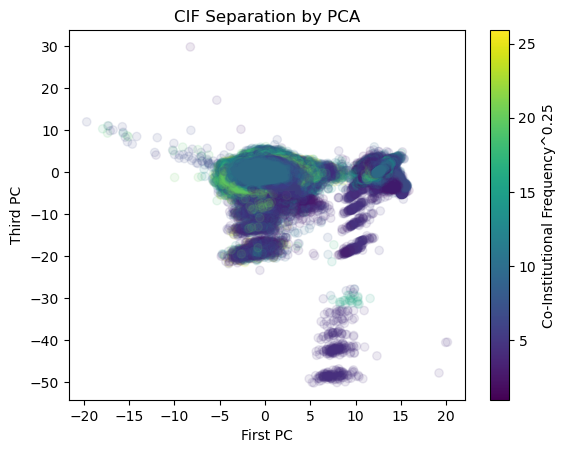

In [52]:
S = plt.scatter(proj[:, 0], proj[:, 2], c=np.power(response, 0.25), alpha=0.1)
cbar = plt.colorbar(S)
cbar.solids.set(alpha=1)
cbar.set_label("Co-Institutional Frequency^0.25")
plt.xlabel("First PC")
plt.ylabel("Third PC")
plt.title("CIF Separation by PCA")

Text(0.5, 1.0, 'CIF Separation by PCA')

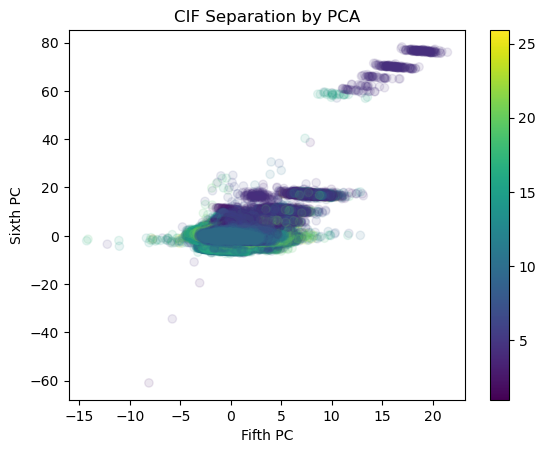

In [27]:
S = plt.scatter(proj[:, 4], proj[:, 5], c=np.power(response, 0.25), alpha=0.1)
cbar = plt.colorbar(S)
cbar.solids.set(alpha=1)
plt.xlabel("Fifth PC")
plt.ylabel("Sixth PC")
plt.title("CIF Separation by PCA")

Text(0.5, 1.0, 'CIF Separation by PCA')

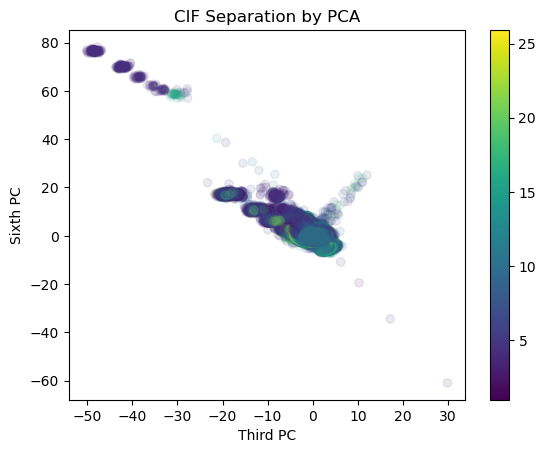

In [28]:
S = plt.scatter(proj[:, 2], proj[:, 5], c=np.power(response, 0.25), alpha=0.1)
cbar = plt.colorbar(S)
cbar.solids.set(alpha=1)
plt.xlabel("Third PC")
plt.ylabel("Sixth PC")
plt.title("CIF Separation by PCA")

Text(0, 0.5, 'Seventh PC')

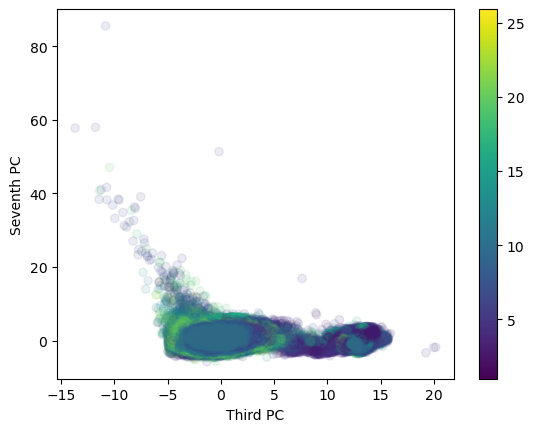

In [ ]:
S = plt.scatter(proj[:, 0], proj[:, 6], c=np.power(response, 0.25), alpha=0.1)
cbar = plt.colorbar(S)
cbar.solids.set(alpha=1)
plt.xlabel("Third PC")
plt.ylabel("Seventh PC")

Text(0, 0.5, 'Eigth PC')

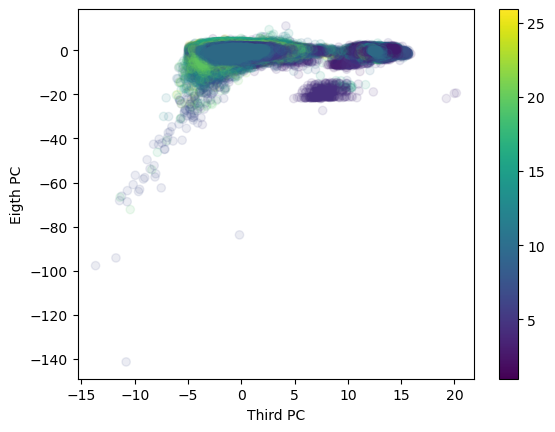

In [144]:
S = plt.scatter(proj[:, 0], proj[:, 7], c=np.power(response, 0.25), alpha=0.1)
cbar = plt.colorbar(S)
cbar.solids.set(alpha=1)
plt.xlabel("Third PC")
plt.ylabel("Eigth PC")

In [115]:
continuous

['loan_amount',
 'combined_loan_to_value_ratio',
 'interest_rate',
 'rate_spread',
 'total_loan_costs',
 'origination_charges',
 'discount_points',
 'lender_credits',
 'loan_term',
 'property_value',
 'total_units',
 'income',
 'debt_to_income_ratio',
 'applicant_age',
 'tract_population',
 'tract_minority_population_percent',
 'ffiec_msa_md_median_family_income',
 'tract_to_msa_income_percentage',
 'tract_owner_occupied_units',
 'tract_one_to_four_family_homes',
 'tract_median_age_of_housing_units',
 'leifreq']

In [114]:
evecs[:, 0]

array([-0.18622962,  0.05926994,  0.11116226,  0.07980107, -0.15905375,
        0.03816066, -0.07752648, -0.0671545 , -0.04727144, -0.18154856,
        0.00743098, -0.11714039,  0.0654796 , -0.03186356, -0.48117901,
       -0.02969009, -0.28511718, -0.29443289, -0.48463271, -0.4649798 ,
       -0.00769094])

### Model

In [8]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor

In [6]:
weirdActions = ["action_taken:_2", "action_taken:_3", "action_taken:_4", "action_taken:_5", "action_taken:_6", "action_taken:_7", "action_taken:_8"]
notNormal = data[weirdActions].any(axis=1)

In [23]:
y = data["leifreq"].to_numpy()
X = data[predictors + categorical].to_numpy()

In [24]:
# ymean = np.mean(np.power(y, 0.25))
response = np.power(y, 0.25)

In [25]:
modela = DecisionTreeRegressor(max_depth=8, min_samples_leaf=100)
modelb = DecisionTreeRegressor(max_depth=8, min_samples_leaf=100)
# modelc = KNeighborsRegressor()
resultCont = modela.fit(X[:, :len(predictors)], response)
resultDisc = modelb.fit(X[:, len(predictors):], response)
# resultKNN = modelc.fit(X[:, :len(predictors)][::50], response[::50])

In [26]:
# knnPreds = resultKNN.predict(X[:, :len(predictors)])
contNodes = resultCont.apply(X[:, :len(predictors)])
discNodes = resultDisc.apply(X[:, len(predictors):])

In [24]:
resultCont.tree_.impurity

array([41.24345995, 40.85262682, 37.68180018, 36.54324955, 37.16337072,
       35.64634838,  7.00537475, 34.63457567, 33.01522011, 35.85208974,
       37.2971113 , 30.01198404, 26.29720216, 30.00940264, 38.02912966,
       36.29745385, 41.49497665, 49.24701296, 51.00960356, 50.07948072,
       44.07720848, 47.59364928, 34.68372282, 33.78898242, 36.07670279,
       45.97595824, 49.62525849, 51.03683267, 46.92376886, 30.33783772,
       28.52052603, 39.82697736, 35.65419539, 34.18049831, 16.31644125,
       42.89446685, 38.47344359, 49.96610614, 11.64606848, 20.21202058,
        5.90768894, 31.97292273, 30.72917371, 19.63715617, 30.47691863,
       28.66982392, 18.02556405, 29.03581321, 32.4668303 , 54.85579873,
       37.33056052, 35.56997555, 12.78754363,  9.35668479,  6.72917033,
       13.44398982, 25.91488303,  2.25672075, 26.42663036,  1.35282314,
       26.38461066, 25.15072982, 26.03945625])

(array([29.,  6., 10.,  7.,  2.,  1.,  2.,  1.,  3.,  2.]),
 array([7.38164046e-03, 3.98798881e+00, 7.96859599e+00, 1.19492032e+01,
        1.59298103e+01, 1.99104175e+01, 2.38910247e+01, 2.78716318e+01,
        3.18522390e+01, 3.58328462e+01, 3.98134534e+01]),
 <BarContainer object of 10 artists>)

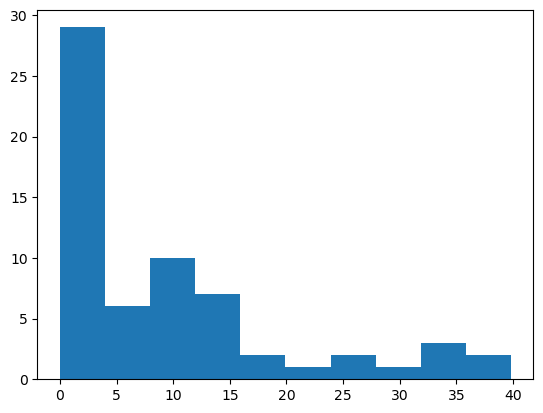

In [175]:
plt.hist(resultDisc.tree_.impurity[np.unique(discNodes)])

(array([ 6.,  5.,  4.,  6., 11., 11., 10.,  5.,  3.,  3.]),
 array([ 1.12317612,  6.3472265 , 11.57127688, 16.79532727, 22.01937765,
        27.24342803, 32.46747842, 37.6915288 , 42.91557918, 48.13962957,
        53.36367995]),
 <BarContainer object of 10 artists>)

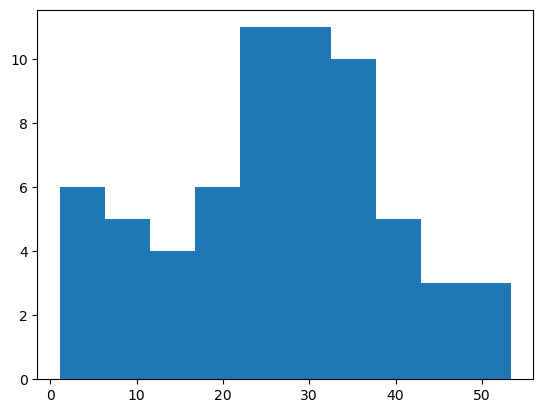

In [176]:
plt.hist(resultCont.tree_.impurity[np.unique(contNodes)])

In [74]:
np.sqrt(np.sqrt(dimp) / np.min(np.sqrt(dimp)))

array([3.92009349, 2.89733758, 3.18413556, 2.70413048, 1.78447788,
       1.        , 1.86496293, 2.70261732, 2.59981414, 2.69577196,
       3.2715774 , 3.31982203, 3.39285061, 1.85415861, 2.99619346,
       2.7677674 , 3.31880847, 1.2431025 , 1.23546663, 1.23422526,
       1.24674968, 1.06324354, 1.17148179, 1.04881938, 1.18962811,
       1.22433495, 1.25783399, 1.25101384, 1.22475545, 1.1763459 ,
       1.16679846, 1.50525354, 3.88228979, 3.87761672, 3.8877219 ,
       3.86409644, 3.82156314, 3.83358524, 3.40660716, 2.95100332,
       3.33058004, 3.41988393, 3.42671107, 3.56935076, 2.41768603,
       3.36470287, 3.13370007, 3.79303695, 2.74687038, 2.72272999,
       2.72275627, 2.7258288 , 2.63068315, 2.43919948, 1.79793534,
       3.14255683, 2.71234041, 2.70361177, 2.68116827, 2.83009412,
       2.09519173, 1.79495319, 2.05225787])

In [235]:
power = 1
power2 = 1
dimp = np.clip(resultDisc.tree_.impurity[discNodes], 5e-1, None)
dweights = 1 / np.power((np.power(dimp, power2) / np.min(np.power(dimp, power2))), power)
# wpredd = resultDisc.tree_.value.flatten()[discNodes] * dweights[discNodes]
normPredd = resultDisc.tree_.value.flatten()[discNodes]
print(np.mean(np.square(normPredd - response)))

cimp = np.clip(resultCont.tree_.impurity[contNodes], 5e-1, None)
cweights = 1 / np.power((np.power(cimp, power2) / np.min(np.power(cimp, power2))), power)
# wpredc = resultCont.tree_.value.flatten()[contNodes] * cweights[contNodes] 
normPredc = resultCont.tree_.value.flatten()[contNodes]
print(np.mean(np.square(normPredc - response)))

sig = lambda x: np.exp(x) / (np.exp(dweights) + np.exp(cweights))

sigPred = normPredc * sig(cweights) + normPredd * sig(dweights)
averagePred = normPredd * 0.5 + normPredc * 0.5

print(np.mean(np.square(sigPred - response)))
print(np.mean(np.square(averagePred - response)))

28.536488444561275
31.621565482819204
26.772892410150035
26.991761412078993


Text(0.5, 1.0, 'Predicted CIF by Income and Discount Points')

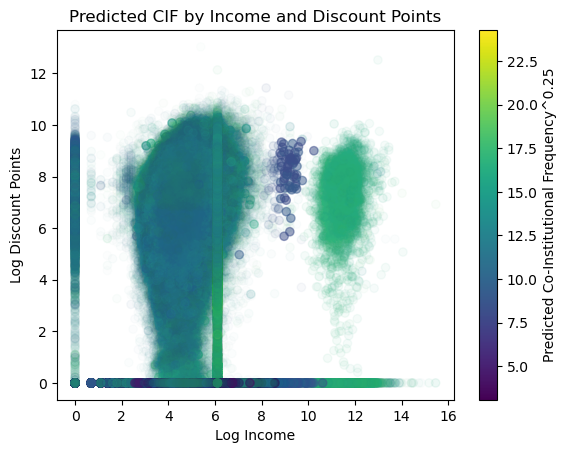

In [236]:
S = plt.scatter(data["income"], data["discount_points"], c=averagePred, alpha=(dweights*0.5 + cweights * 0.5))
cbar = plt.colorbar(S)
cbar.solids.set(alpha=1)
cbar.set_label("Predicted Co-Institutional Frequency^0.25")
plt.xlabel("Log Income")
plt.ylabel("Log Discount Points")
plt.title("Predicted CIF by Income and Discount Points")

Text(0, 0.5, 'Interest Rate')

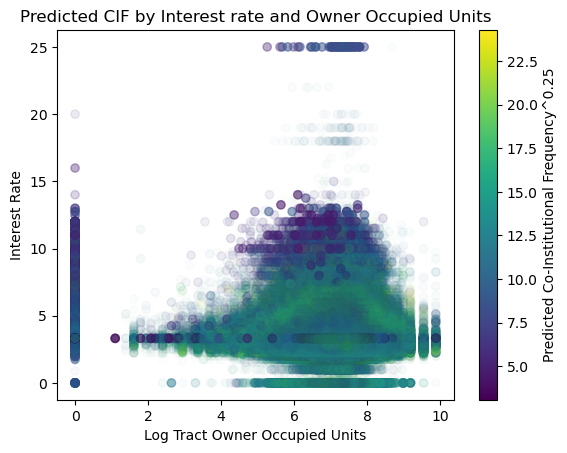

In [238]:
S = plt.scatter(data["tract_owner_occupied_units"], data["interest_rate"], c=averagePred, alpha=(dweights*0.5 + cweights * 0.5))
cbar = plt.colorbar(S)
cbar.solids.set(alpha=1)
cbar.set_label("Predicted Co-Institutional Frequency^0.25")
plt.title("Predicted CIF by Interest rate and Owner Occupied Units")
plt.xlabel("Log Tract Owner Occupied Units")
plt.ylabel("Interest Rate")

In [47]:
np.unique(contNodes)

array([ 5,  6,  8,  9, 12, 13, 15, 16, 20, 21, 23, 24, 27, 28, 30, 31, 36,
       37, 39, 40, 43, 44, 46, 47, 51, 52, 54, 55, 58, 59, 61, 62])

In [ ]:
np.save("output/knnpreds", knnPreds)

In [42]:
np.mean(np.square(resultDisc.predict(X[:, len(predictors):]) * 0.5 + resultCont.predict(X[:, :len(predictors)]) * 0.5 - np.power(y, 0.25)))

30.858483395598448

In [26]:
impsort = np.argsort(result.tree_.impurity)
imps = result.tree_.impurity[impsort]

In [27]:
imps

array([-3.44186901e-11, -7.47490958e-12, -3.35376171e-12, ...,
        6.41670456e+01,  6.93694056e+01,  7.68137855e+01])

Tree plots, can change parameters to show more or less of the trees

Text(0.5, 1.0, 'Numerical Variables')

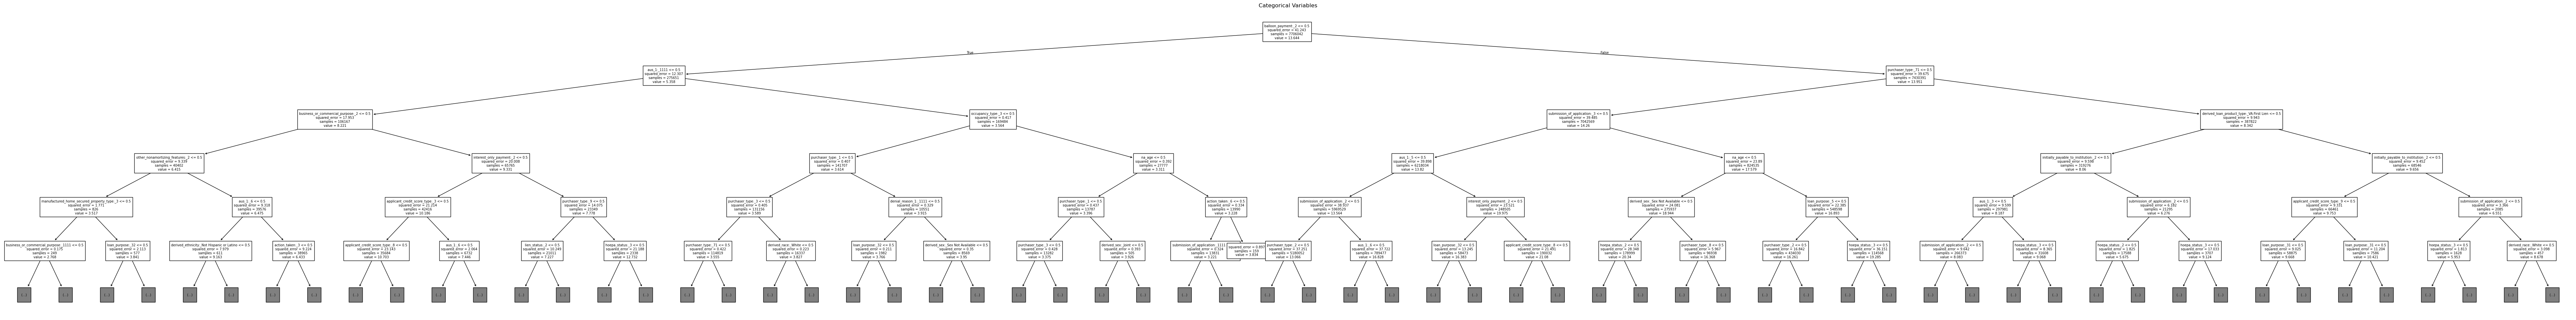

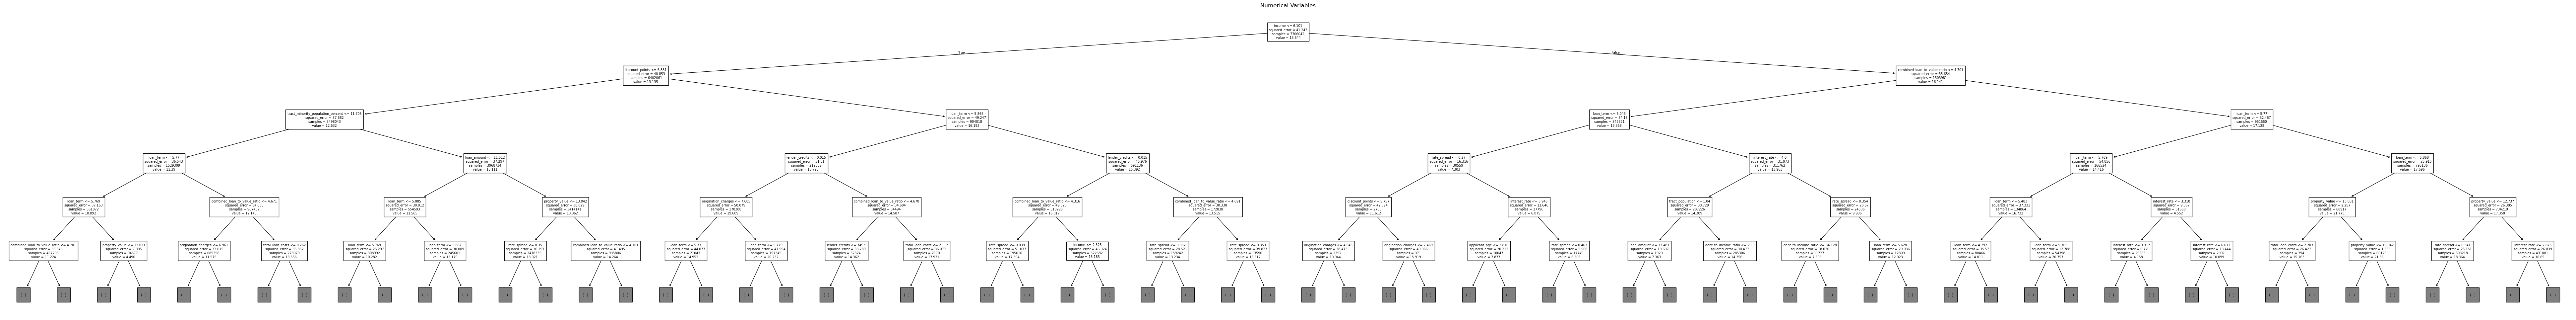

In [244]:
plt.figure(figsize=(100,12))
plot_tree(resultDisc, fontsize=7, feature_names=categorical, max_depth=5)
plt.title("Categorical Variables")
plt.figure(figsize=(100,12))
plot_tree(resultCont, fontsize=7, feature_names=predictors, max_depth=5)
plt.title("Numerical Variables")

In [210]:
np.exp(data["loan_term"]) / 12

0          15.0
1          30.0
2          30.0
3          30.0
4          15.0
           ... 
7706037    30.0
7706038    30.0
7706039    30.0
7706040    30.0
7706041    15.0
Name: loan_term, Length: 7706042, dtype: float64

In [26]:
(predictors + categorical)[64]

'purchaser_type:_71'

In [ ]:
resultCont.tree_.threshold

(459,)

In [36]:
resultCont.tree_.impurity.shape

(459,)

In [45]:
resultCont.tree_.children_left

array([  1,   2,   3,   4,   5,   6,   7,   8,  -1,  -1,  11,  -1,  -1,
        14,  15,  -1,  -1,  18,  -1,  -1,  21,  22,  23,  -1,  -1,  26,
        -1,  -1,  29,  30,  -1,  -1,  33,  -1,  -1,  36,  37,  38,  39,
        -1,  -1,  42,  -1,  -1,  45,  46,  -1,  -1,  49,  -1,  -1,  52,
        53,  54,  -1,  -1,  57,  -1,  -1,  60,  61,  -1,  -1,  64,  -1,
        -1,  67,  68,  69,  70,  71,  -1,  -1,  74,  -1,  -1,  77,  78,
        -1,  -1,  81,  -1,  -1,  84,  85,  86,  -1,  -1,  89,  -1,  -1,
        92,  93,  -1,  -1,  96,  -1,  -1,  99, 100, 101, 102,  -1,  -1,
       105,  -1,  -1, 108, 109,  -1,  -1, 112,  -1,  -1, 115, 116, 117,
        -1,  -1, 120,  -1,  -1, 123, 124,  -1,  -1, 127,  -1,  -1, 130,
       131, 132, 133, 134, 135,  -1,  -1, 138,  -1,  -1, 141, 142,  -1,
        -1, 145,  -1,  -1, 148, 149, 150,  -1,  -1, 153,  -1,  -1, 156,
       157,  -1,  -1, 160,  -1,  -1, 163, 164, 165, 166,  -1,  -1, 169,
        -1,  -1, 172, 173,  -1,  -1,  -1, 177,  -1, 179, 180,  -

In [49]:
resultCont.tree_.n_node_samples

array([7706042, 6402061, 5498043, 1529309,  561872,  467295,  326841,
        109038,  103604,    5434,  217803,   83961,  133842,  140454,
        125319,    5668,  119651,   15135,    1574,   13561,   94577,
          8374,    7570,     492,    7078,     804,     144,     660,
         86203,   84416,    3017,   81399,    1787,     186,    1601,
        967437,  689358,  213190,   56652,   21002,   35650,  156538,
        142839,   13699,  476168,   40514,   12706,   27808,  435654,
        170602,  265052,  278079,  217989,   20178,    5666,   14512,
        197811,    1157,  196654,   60090,    6713,    3056,    3657,
         53377,   50755,    2622, 3968734,  554593,  308992,  273354,
        171122,  161224,    9898,  102232,   68939,   33293,   35638,
         13027,    9689,    3338,   22611,   21340,    1271,  245601,
        230979,   32363,   27758,    4605,  198616,  135428,   63188,
         14622,    7012,     256,    6756,    7610,     399,    7211,
       3414141, 2478

#### Full tree summary

Full trees written out, can be searched for interesting features
```
Format is: <feature name> <= <threshold> (<number of samples to be split>)? <value of left child> +- <1*sigma> : <value of right child> +- <1*sigma>
```

Continuous tree:

In [54]:
[f"{predictors[x]} <= {resultCont.tree_.threshold[i]} ({resultCont.tree_.n_node_samples[i]})? {resultCont.tree_.value[resultCont.tree_.children_left[i]][0][0]} +- {np.sqrt(resultCont.tree_.impurity[resultCont.tree_.children_left[i]])} : {resultCont.tree_.value[resultCont.tree_.children_right[i]][0][0]} +- {np.sqrt(resultCont.tree_.impurity[resultCont.tree_.children_right[i]])}" for i, x in enumerate(resultCont.tree_.feature) if resultCont.tree_.n_node_samples[i] > 199]

['income <= 6.100661516189575 (7706042)? 13.135079070042 +- 6.391605965892068 : 16.141301317298353 +- 5.971113415134677',
 'discount_points <= 6.830890417098999 (6402061)? 12.632244599939638 +- 6.138550331961104 : 16.193210145379883 +- 7.01762160120178',
 'tract_minority_population_percent <= 11.704999923706055 (5498043)? 11.390277044345343 +- 6.045101285574255 : 13.110823451602426 +- 6.107136096410458',
 'loan_term <= 5.770426273345947 (1529309)? 10.09156036295376 +- 6.096176729566169 : 12.14455100657496 +- 5.885114754218482',
 'loan_term <= 5.768866300582886 (561872)? 11.22415270908945 +- 5.970456295717731 : 4.495540819204717 +- 2.646766847738218',
 'combined_loan_to_value_ratio <= 4.70113468170166 (467295)? 10.384678475522582 +- 5.958949651555188 : 13.17763639752492 +- 5.523565549798581',
 'loan_amount <= 11.511673927307129 (326841)? 8.75626266452358 +- 4.675645014149429 : 11.1999069305967 +- 6.352103427661139',
 'discount_points <= 0.638117641210556 (109038)? 8.558914931089486 +- 4

Categorical tree

In [53]:
[f"{categorical[x]} <= {resultDisc.tree_.threshold[i]} ({resultDisc.tree_.n_node_samples[i]})? {resultDisc.tree_.value[resultDisc.tree_.children_left[i]][0][0]} +- {np.sqrt(resultDisc.tree_.impurity[resultDisc.tree_.children_left[i]])} : {resultDisc.tree_.value[resultDisc.tree_.children_right[i]][0][0]} +- {np.sqrt(resultDisc.tree_.impurity[resultDisc.tree_.children_right[i]])}" for i, x in enumerate(resultDisc.tree_.feature) if resultDisc.tree_.n_node_samples[i] > 199]

/tmp/ipykernel_210685/3133710901.py:1: RuntimeWarning: invalid value encountered in sqrt
  [f"{categorical[x]} <= {resultDisc.tree_.threshold[i]} ({resultDisc.tree_.n_node_samples[i]})? {resultDisc.tree_.value[resultDisc.tree_.children_left[i]][0][0]} +- {np.sqrt(resultDisc.tree_.impurity[resultDisc.tree_.children_left[i]])} : {resultDisc.tree_.value[resultDisc.tree_.children_right[i]][0][0]} +- {np.sqrt(resultDisc.tree_.impurity[resultDisc.tree_.children_right[i]])}" for i, x in enumerate(resultDisc.tree_.feature) if resultDisc.tree_.n_node_samples[i] > 199]


['balloon_payment:_2 <= 0.5 (7706042)? 5.357788530777303 +- 3.50818830449093 : 13.951169987425509 +- 6.298840288058825',
 'aus_1:_1111 <= 0.5 (275651)? 8.221295056007136 +- 4.2370910261382875 : 3.564050494953418 +- 0.6458007993765753',
 'business_or_commercial_purpose:_2 <= 0.5 (106167)? 6.414566559566375 +- 3.05590594397565 : 9.331238714684769 +- 4.4730020290456025',
 'other_nonamortizing_features:_2 <= 0.5 (40402)? 3.5174888194255485 +- 1.3307823641898613 : 6.475032150160539 +- 3.052486898210037',
 'manufactured_home_secured_property_type:_3 <= 0.5 (826)? 2.767909925729393 +- 0.41791186064853136 : 3.8409639399287423 +- 1.4535336926073343',
 'business_or_commercial_purpose:_1111 <= 0.5 (249)? 3.101363038010984 +- 0.18321321121359316 : 2.4151661375306888 +- 0.2860834006514138',
 'loan_purpose:_32 <= 0.5 (577)? 4.138351777532585 +- 1.769359190534001 : 3.4019020681015246 +- 0.5353807979281585',
 'applicant_credit_score_type:_9 <= 0.5 (344)? 3.7454528415179813 +- 1.0392443522258983 : 5.02

### Model on originated loans only

In [9]:
weirdActions = ["action_taken:_2", "action_taken:_3", "action_taken:_4", "action_taken:_5", "action_taken:_6", "action_taken:_7", "action_taken:_8"]
notNormal = data[weirdActions].any(axis=1).to_numpy()

In [12]:
y = data["leifreq"].to_numpy()[~notNormal]
X = data[predictors + categorical].to_numpy()[~notNormal, :]

In [13]:
# ymean = np.mean(np.power(y, 0.25))
response = np.power(y, 0.25)

In [14]:
modela = DecisionTreeRegressor(max_depth=8, min_samples_leaf=100)
modelb = DecisionTreeRegressor(max_depth=8, min_samples_leaf=100)
# modelc = KNeighborsRegressor()
resultCont = modela.fit(X[:, :len(predictors)], response)
resultDisc = modelb.fit(X[:, len(predictors):], response)
# resultKNN = modelc.fit(X[:, :len(predictors)][::50], response[::50])

In [15]:
# knnPreds = resultKNN.predict(X[:, :len(predictors)])
contNodes = resultCont.apply(X[:, :len(predictors)])
discNodes = resultDisc.apply(X[:, len(predictors):])

In [16]:
power = 1
power2 = 1
dimp = np.clip(resultDisc.tree_.impurity[discNodes], 5e-1, None)
dweights = 1 / np.power((np.power(dimp, power2) / np.min(np.power(dimp, power2))), power)
# wpredd = resultDisc.tree_.value.flatten()[discNodes] * dweights[discNodes]
normPredd = resultDisc.tree_.value.flatten()[discNodes]
print(np.mean(np.square(normPredd - response)))

cimp = np.clip(resultCont.tree_.impurity[contNodes], 5e-1, None)
cweights = 1 / np.power((np.power(cimp, power2) / np.min(np.power(cimp, power2))), power)
# wpredc = resultCont.tree_.value.flatten()[contNodes] * cweights[contNodes] 
normPredc = resultCont.tree_.value.flatten()[contNodes]
print(np.mean(np.square(normPredc - response)))

sig = lambda x: np.exp(x) / (np.exp(dweights) + np.exp(cweights))

sigPred = normPredc * sig(cweights) + normPredd * sig(dweights)
averagePred = normPredd * 0.5 + normPredc * 0.5

print(np.mean(np.square(sigPred - response)))
print(np.mean(np.square(averagePred - response)))

29.108692841781778
30.49547900799766
26.134302852202104
26.2312704295519


Text(0.5, 1.0, 'Numerical Variables')

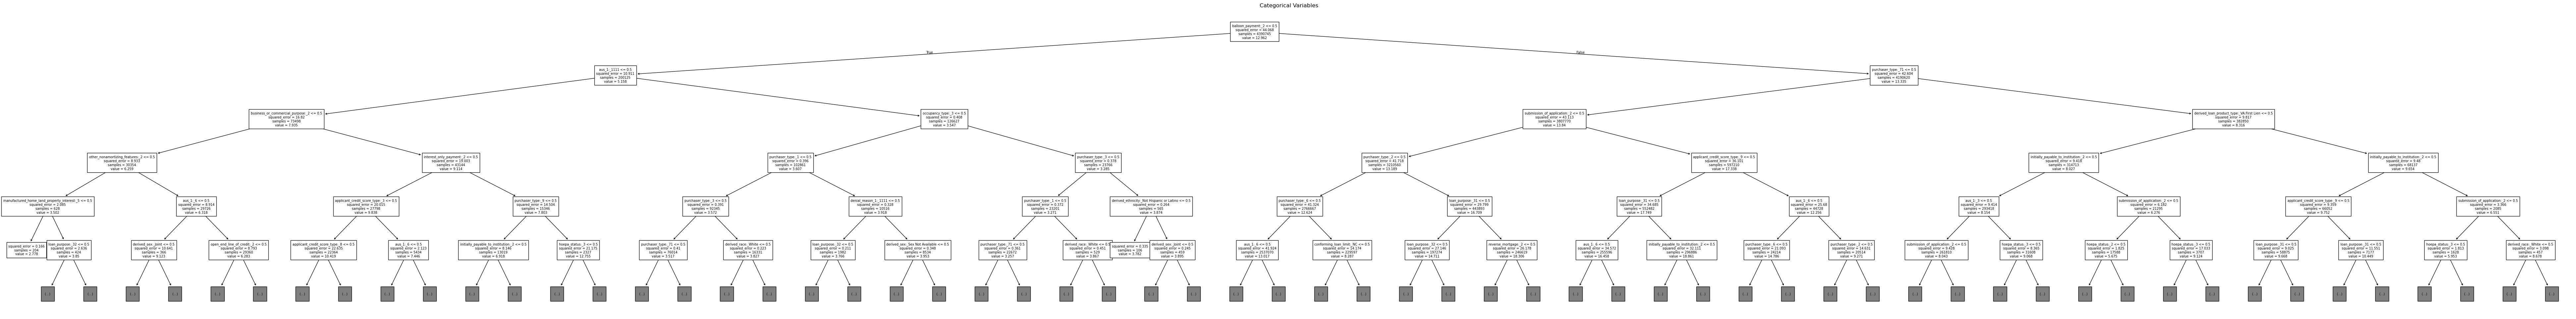

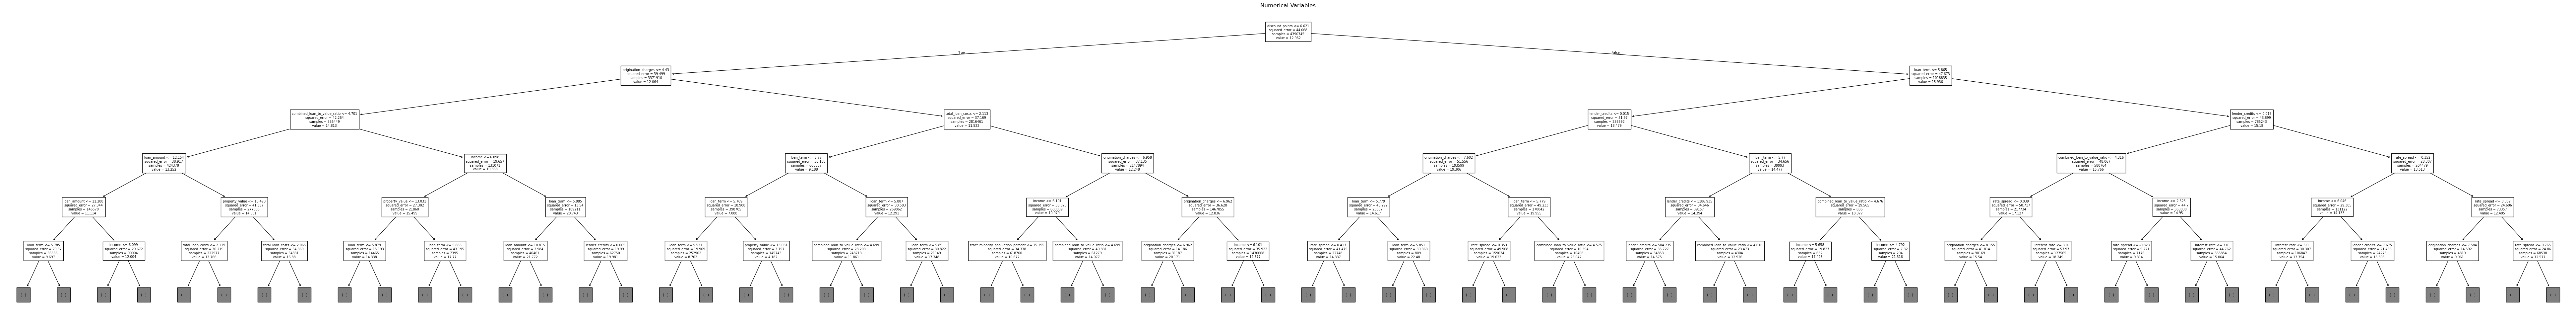

In [17]:
plt.figure(figsize=(100,12))
plot_tree(resultDisc, fontsize=7, feature_names=categorical, max_depth=5)
plt.title("Categorical Variables")
plt.figure(figsize=(100,12))
plot_tree(resultCont, fontsize=7, feature_names=predictors, max_depth=5)
plt.title("Numerical Variables")

Looks not too different from the rest of the dataset, probably no need to subset to originated loans only.